In [2]:
import numpy as np
from sklearn.manifold import TSNE
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import h5py

from pytorch_pretrained_bert import BertTokenizer

from collections import defaultdict

In [3]:
fi_preds = np.load("/u/scr/ethanchi/relationOutputs/fi-en-8/train-pred.npy", allow_pickle=True)
is_adjunct = np.vectorize(lambda x: x and ('PBArgM' in x or 'AM' in x) and '|' not in x and 'R' not in x)
fi_indices = is_adjunct(fi_preds)
fi_preds = fi_preds[fi_indices]
fi_words = np.load("/u/scr/ethanchi/relationOutputs/fi-en-8/train-words.npy", allow_pickle=True)[fi_indices]
fi_words = list(fi_words)

In [5]:
subword_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
subwords = subword_tokenizer.wordpiece_tokenizer.tokenize(' '.join(fi_words))
subword_mapping = defaultdict(int)
for subword in subwords:
  subword = subword.replace('##', '')
  subword_mapping[subword] += 1
  
print(sorted(subword_mapping.items(), key=lambda kv: -subword_mapping[kv[0]])[:5])

The pre-trained model you are loading is a cased model but you have not set `do_lower_case` to False. We are setting `do_lower_case=False` for you but you may want to check this behavior.


[('ei', 273), ('on', 243), ('ä', 188), ('n', 174), ('voi', 155)]


In [6]:
total_subwords = sum(subword_mapping[k] for k in subword_mapping)
print("Total number of subwords is", total_subwords)

Total number of subwords is 12209


In [7]:
en_preds = np.load("/u/scr/ethanchi/relationOutputs/fi-en-8/pred.npy", allow_pickle=True)

is_adjunct = np.vectorize(lambda x: x and ('PBArgM' in x or 'AM' in x) and '|' not in x and 'R' not in x)
en_indices = is_adjunct(en_preds)
en_preds = en_preds[en_indices]
en_words = np.load("/u/scr/ethanchi/relationOutputs/fi-en-8/words.npy", allow_pickle=True)[en_indices]
en_words = list(en_words)


en_logit_file = h5py.File('/u/scr/ethanchi/relationOutputs/fi-en-8/logits.hdf5')
en_logits = en_logit_file.get('logits')[()]
en_logits = en_logits[en_indices]
en_logit_file.close()

en_labels = np.load("/u/scr/ethanchi/relationOutputs/fi-en-8/labels.npy")
en_labels = en_labels[en_indices]


In [11]:
softmax = np.exp(en_logits) / np.sum(np.exp(en_logits), axis=1, keepdims=True)
accuracy = (np.argmax(en_logits, axis=1) == en_labels.astype(int))
print(accuracy)

[ True  True False ...  True  True  True]


In [25]:
tokenized = [subword_tokenizer.wordpiece_tokenizer.tokenize(word) for word in en_words]
freq = [sum(subword_mapping[token] for token in token_seq) / (len(token_seq)) for token_seq in tokenized]
freq = np.array(freq)
top_indices = np.argsort(-freq)[:1000]
for f, w in zip(freq[top_indices], np.array(en_words)[top_indices]):
  print(f, '\t', w)

243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
243.0 	 on
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 in
95.0 	 i

0.0 	 And
0.0 	 However
0.0 	 should
0.0 	 month
0.0 	 because
0.0 	 In
0.0 	 since
0.0 	 revealed
0.0 	 at
0.0 	 because
0.0 	 because
0.0 	 outside
0.0 	 but
0.0 	 solely
0.0 	 But
0.0 	 by
0.0 	 Monday
0.0 	 while
0.0 	 big
0.0 	 Friday
0.0 	 may
0.0 	 instead
0.0 	 though
0.0 	 also
0.0 	 Friday
0.0 	 As
0.0 	 following
0.0 	 today
0.0 	 since
0.0 	 can
0.0 	 Also
0.0 	 month
0.0 	 with
0.0 	 Friday
0.0 	 once
0.0 	 could
0.0 	 dragged
0.0 	 never
0.0 	 again
0.0 	 by
0.0 	 now
0.0 	 out
0.0 	 may
0.0 	 became
0.0 	 meet
0.0 	 would
0.0 	 racial
0.0 	 wo
0.0 	 year
0.0 	 still
0.0 	 And
0.0 	 week
0.0 	 temporary
0.0 	 because
0.0 	 temporary
0.0 	 years
0.0 	 will
0.0 	 of
0.0 	 between
0.0 	 before
0.0 	 actually
0.0 	 since
0.0 	 may
0.0 	 In
0.0 	 actually
0.0 	 July
0.0 	 region
0.0 	 since
0.0 	 area
0.0 	 And
0.0 	 for
0.0 	 instead
0.0 	 will
0.0 	 By
0.0 	 year
0.0 	 will
0.0 	 all
0.0 	 Under
0.0 	 Also
0.0 	 may
0.0 	 Beijing
0.0 	 should
0.0 	 will
0.0 	 will
0.0 	 will

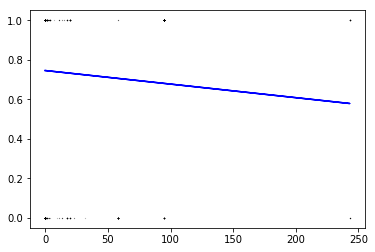

In [32]:
plt.scatter(freq, accuracy, c="black", s=0.01)


linreg = LinearRegression()
linreg.fit(freq.reshape(-1, 1), accuracy)

plt.plot(freq, linreg.predict(freq.reshape(-1, 1)), color="blue")
print(linreg.score(freq_data[:, 0].reshape(-1, 1)))

(21, 2)


TypeError: score() missing 1 required positional argument: 'y'

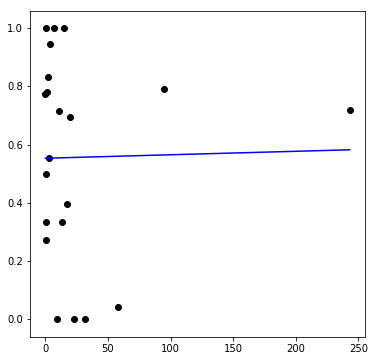

In [34]:
plt.figure(figsize=(6, 6))
freq_data = {}
for possible_freq in np.unique(freq):
  freq_data[possible_freq] = np.average(accuracy[freq == possible_freq])

freq_data = np.array([kv for kv in freq_data.items()])
print(freq_data.shape)
plt.scatter(freq_data[:, 0], freq_data[:, 1], c="black")

linreg = LinearRegression()
linreg.fit(freq_data[:, 0].reshape(-1, 1), freq_data[:, 1])

plt.plot(freq_data[:, 0], linreg.predict(freq_data[:, 0].reshape(-1, 1)), color="blue")
